🌟 **Exercise 1:** Duplicate Detection and Removal

In [1]:
# The files were manually downloaded and uploaded to Colab via drag-and-drop
import pandas as pd

titanic_data = pd.read_csv('train.csv')
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print(f"number of duplicate rows before treatment : {titanic_data.duplicated().sum()}")
print(f"Total rows before treatment: {titanic_data.shape[0]}")


number of duplicate rows before treatment : 0
Total rows before treatment: 891


In [3]:
# There are no dupplicate rows based on all columns, but let say there are
# Remove duplicate rows
titanic_data = titanic_data.drop_duplicates()

# Verify duplicates are removed
print(f"number of duplicate rows after treatment: {titanic_data.duplicated().sum()}")
print(f"Total rows after treatment: {titanic_data.shape[0]}")


number of duplicate rows after treatment: 0
Total rows after treatment: 891


🌟 **Exercise 2:** Handling Missing Values

In [4]:
#Check for missing values in titanic_data
missing_data = titanic_data.isnull()
print(missing_data.head())
# True is the value is missing, False if not

print("======================================================")
# Count missing values in each column
missing_counts = titanic_data.isnull().sum()
print("Number of missing values in each column :")
print(missing_counts)

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  
Number of missing values in each column :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see there are 3 colums where some of the values are missing.
Let's treat each of them.

In [5]:
total_rows = titanic_data.shape[0]
print(f"Total rows in the dataset: {total_rows}")

Total rows in the dataset: 891


**First column :** *Age*

177 values missing out of 891

In [6]:
# We can do an imputation by filling the missing values with the mean of the column

titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].mean())
print(titanic_data.head())

print("======================================================")
print("Number of missing values in 'Age' column after :")
print(titanic_data["Age"].isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Nu

**Second column :** *Cabin*

682 missing values out of 891

In [7]:
# There are too much missing values for this column, and the information
# we can extract of it is not really important so we can delete this column
print("Is there a 'Cabin' column ?", "Cabin" in titanic_data.columns)

titanic_data = titanic_data.drop("Cabin", axis=1)
# print(titanic_data.head())
print("After the dropping :")
print("Is there a 'Cabin' column ?", "Cabin" in titanic_data.columns)


Is there a 'Cabin' column ? True
After the dropping :
Is there a 'Cabin' column ? False


**Third column :** *Embarqued*

2 missing values out of 891

In [8]:
# There are only 2 missing values, so we can fill them with the most frequent value
most_frequent_embarked = titanic_data["Embarked"].mode()[0]
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(most_frequent_embarked)

# print(titanic_data.head())

print("======================================================")
print("Number of missing values in 'Embarqued' column after :")
print(titanic_data["Embarked"].isnull().sum())


Number of missing values in 'Embarqued' column after :
0


🌟 **Exercise 3:** Feature Engineering

* Create new features, such as Family Size
from SibSp and Parch, and Title extracted from the Name column.




In [9]:
# Create 'FamilySize'

titanic_data["FamilySize"] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
# +1 to include the person herself
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            37345

In [10]:
# Extract title from 'Name'

titanic_data["Title"] = titanic_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
print(titanic_data["Title"].unique())
# print(titanic_data.head())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


* Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.



In [11]:
# The column 'Sex' and 'Embarqued' are categorical variables
# 'Sex' : a person can be 'male' or 'female'
# 'Embarqued' : there are 3 categories of boarding {S, C, Q}

# One-Hot Encoding : pd.get_dummies()
titanic_data = pd.get_dummies(titanic_data, columns=["Sex", "Embarked"], drop_first=True)
# drop_first=True because if a person isn't 'male', she is 'female'

print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize Title  Sex_male  Embarked_Q  \
0         A/5 21171   7.2500           2    Mr      True       False   
1          PC 17599  71.2833           2   Mrs     False       False   
2  STON/O2. 3101282   7.9250           1  Miss     False       False   
3            113803  53.1000          

In [12]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder() converts text categories to integers
encoder = LabelEncoder()
titanic_data["Title"] = encoder.fit_transform(titanic_data["Title"])


In [13]:
print("Here are the corresponding transformation :")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

print("======================================================")
print(titanic_data.head())


Here are the corresponding transformation :
{'Capt': 0, 'Col': 1, 'Countess': 2, 'Don': 3, 'Dr': 4, 'Jonkheer': 5, 'Lady': 6, 'Major': 7, 'Master': 8, 'Miss': 9, 'Mlle': 10, 'Mme': 11, 'Mr': 12, 'Mrs': 13, 'Ms': 14, 'Rev': 15, 'Sir': 16}
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  Title  Sex_male  Embarked_Q  \
0         A/5 2

In [14]:
# Saving the data before normalize them for further
titanic_data_before_scaling = titanic_data.copy()
print(titanic_data_before_scaling)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

* Normalize or standardize numerical features if required.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ["Age", "Fare", "FamilySize"]  # List of colonnes to normalise
titanic_data[num_features] = scaler.fit_transform(titanic_data[num_features])

print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  0.271174      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.472229      1      0   
2                             Heikkinen, Miss. Laina  0.321438      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.434531      1      0   
4                           Allen, Mr. William Henry  0.434531      0      0   

             Ticket      Fare  FamilySize  Title  Sex_male  Embarked_Q  \
0         A/5 21171  0.014151         0.1     12      True       False   
1          PC 17599  0.139136         0.1     13     False       False   
2  STON/O2. 3101282  0.015469         0.0      9     False       False   
3     

🌟 **Exercise 4:** Outlier Detection and Handling

In [16]:
print(f"Total rows before treatment: {titanic_data.shape[0]}")

def remove_outliers(df, column):
    """Delete outliers from a column using l'IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Total rows before removing {column} outliers: {df.shape[0]}")
    print(f"Total rows after removing {column} outliers: {df_filtered.shape[0]}")

    return df_filtered

# if we don't want to loss the data, we could replace the outliers with
# lower_bound and upper_bound instead of deleting them

#     df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
#     return df


Total rows before treatment: 891


In [17]:
titanic_data = remove_outliers(titanic_data, "Fare")
print("======================================================")
titanic_data = remove_outliers(titanic_data, "Age")


Total rows before removing Fare outliers: 891
Total rows after removing Fare outliers: 775
Total rows before removing Age outliers: 775
Total rows after removing Age outliers: 708


🌟 Exercise 5: Data Standardization and Normalization

* Assess the scale and distribution of numerical columns in the dataset.

       PassengerId    Survived      Pclass         Age       SibSp  \
count   708.000000  708.000000  708.000000  708.000000  708.000000   
mean    449.714689    0.331921    2.518362    0.352112    0.399718   
std     260.208426    0.471236    0.714332    0.119765    0.840859   
min       1.000000    0.000000    1.000000    0.044986    0.000000   
25%     219.500000    0.000000    2.000000    0.271174    0.000000   
50%     450.500000    0.000000    3.000000    0.367921    0.000000   
75%     676.250000    1.000000    3.000000    0.396833    1.000000   
max     891.000000    1.000000    3.000000    0.648153    5.000000   

            Parch        Fare  FamilySize       Title  
count  708.000000  708.000000  708.000000  708.000000  
mean     0.313559    0.033445    0.071328   11.398305  
std      0.782038    0.026183    0.135120    1.617478  
min      0.000000    0.000000    0.000000    3.000000  
25%      0.000000    0.015379    0.000000   12.000000  
50%      0.000000    0.021942    

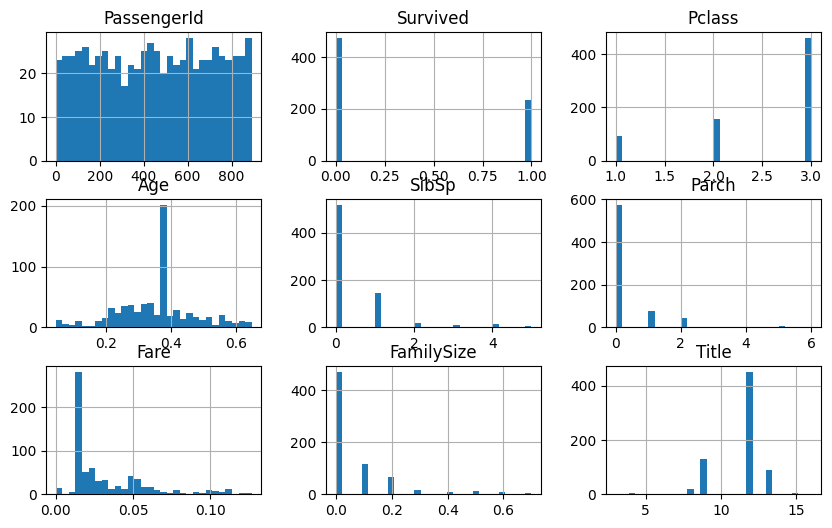

In [18]:
import matplotlib.pyplot as plt

print(titanic_data.describe())

titanic_data.hist(figsize=(10, 6), bins=30)
plt.show()


* Apply standardization to features with a wide range of values.

In [19]:
# According to 'titanic_data.describe()', the 'std' of numerical variables,
# none of the columns 'Fare', 'Age', 'FamilySize' have high dispersion (std >5)
# Standardizing these columns would not significantly change their distribution,
# as they are already well-compressed.

# The other columns are categories and should not be normalized



* Normalize data that requires a bounded range, like [0, 1].

In [20]:
# Fare, Age, and FamilySize have already been normalized to the [0,1] range
# in exercise 3.
# No need to apply 'MinMaxScaler' again.

🌟 **Exercise 6:** Feature Encoding

Categorical variables (Sex, Embarked, and Title) were identified and encoded in a previous step (exercise 3).

* One-hot encoding (pd.get_dummies()) was applied to Sex and Embarked since they are nominal variables.
* Label encoding (LabelEncoder) was applied to Title since it represents ordinal categories.
* Pclass was not encoded because it is already numerical and represents an ordinal category.

These transformations were integrated into the dataset, and the encoded columns are now used for further analysis.

🌟**Exercise 7:** Data Transformation for Age Feature

* Create age groups (bins) from the Age column to categorize passengers into different age categories.

In [21]:
# Define age ranges and group labels
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teenager", "Young Adult", "Adult", "Senior"]  # group names


titanic_data["Age"] = titanic_data_before_scaling["Age"]

# Apply binning on 'Age'
titanic_data["AgeGroup"] = pd.cut(titanic_data["Age"], bins=bins, labels=labels, right=False)

# Check the distribution of age groups
print(titanic_data["AgeGroup"].value_counts())

AgeGroup
Young Adult    487
Adult          145
Teenager        40
Child           36
Senior           0
Name: count, dtype: int64


* Apply one-hot encoding to the age groups to convert them into binary features.

In [22]:
titanic_data = pd.get_dummies(titanic_data, columns=["AgeGroup"], drop_first=True)

print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name        Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris  22.000000      1      0   
2                        Heikkinen, Miss. Laina  26.000000      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1      0   
4                      Allen, Mr. William Henry  35.000000      0      0   
5                              Moran, Mr. James  29.699118      0      0   

             Ticket      Fare  FamilySize  Title  Sex_male  Embarked_Q  \
0         A/5 21171  0.014151         0.1     12      True       False   
2  STON/O2. 3101282  0.015469         0.0      9     False       False   
3            113803  0.103644         0.1     13     False       False   
4            373450  0.015713 

In [23]:
print(titanic_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'Title', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'AgeGroup_Teenager', 'AgeGroup_Young Adult',
       'AgeGroup_Adult', 'AgeGroup_Senior'],
      dtype='object')
